<p align=center>
<img src="https://raw.githubusercontent.com/oemeferreira/sigmoidal-projetos/main/images/Capa-Emerson.png" width="100%"></p>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# **Prevendo o custo de Seguro de vida**

<img alt="Colaboratory logo" width="40%" src="https://cdn.pixabay.com/photo/2018/05/14/13/57/family-3400033_960_720.jpg">

A importância de um **seguro de vida é inegável**, pois ele garante a proteção financeira da família do segurado em caso de sua morte prematura.

Além disso, um seguro de vida também pode ser usado como uma forma de poupança, com o pagamento de benefícios adicionais no caso de sobrevivência do segurado até a data de vencimento do contrato.

No entanto, para as empresas de seguros, **prever o custo do seguro de vida é um desafio.** 

Isso é devido ao fato de que o custo do seguro de vida é influenciado por uma série de fatores, *incluindo idade, sexo, estado de saúde, histórico médico, entre outros.* 

Além disso, as tendências de mortalidade e morbidade estão constantemente mudando, o que torna ainda mais difícil prever o custo do seguro de vida.

O projeto de ciência de dados em questão visa **desenvolver um modelo de regressão** que possa prever o custo do seguro de vida com precisão. 

Para alcançar esse objetivo, os dados disponíveis no Kaggle serão utilizados. Esses dados incluem informações sobre idade, sexo, estado de saúde, histórico médico, entre outros, para uma amostra de indivíduos. 

O modelo será treinado com esses dados e, em seguida, será testado para avaliar sua capacidade de **prever o custo do seguro de vida.**

Este projeto de ciência de dados tem implicações significativas para as empresas de seguros, pois *um modelo de previsão preciso do custo do seguro* de vida pode ajudar as empresas a estabelecer tarifas mais precisas e, assim, tornar-se mais competitivo no mercado. 

Além disso, pode ajudar a identificar os indivíduos com maior risco e, assim, **permitir que as empresas adaptem suas estratégias de seguros** para atender às necessidades de seus clientes.

### **Objetivos específicos**

Para atingirmos o objetivo geral proposto iremos realizar as seguintes etapas de modo a conhecer nossos dados e escolher o melhor modelo para o problema proposto:

1. **Coleta de dados:** A primeira etapa é coletar os dados necessários para o projeto. Neste caso, os dados estão disponíveis no Kaggle e incluem informações sobre idade, sexo, estado de saúde, histórico médico, entre outros, para uma amostra de indivíduos.

2. **Análise explorátória:** A segunda etapa é compreender os dados que estão disponíveis para o projeto. Isso inclui coletar, limpar e explorar os dados, identificar quaisquer problemas ou limitações e determinar se os dados são adequados para alcançar os objetivos do projeto.

3. **Preparação dos dados:** Depois de coletar os dados, a próxima etapa é prepará-los para o treinamento do modelo. Isso inclui limpeza de dados, tratamento de valores faltantes, normalização de dados, e outras tarefas de pré-processamento.

4. **Treinamento do modelo:** Com os dados limpos e preparados, o próximo passo é treinar o modelo de regressão. Isso inclui selecionar uma técnica de regressão (por exemplo, regressão linear, regressão logística, etc.) e ajustar os parâmetros do modelo usando técnicas de validação cruzada.

5. **Teste do modelo:** Uma vez treinado, o modelo precisa ser testado com dados que não foram utilizados durante o treinamento. Isso é feito para avaliar a precisão do modelo e identificar quaisquer problemas ou oportunidades de melhoria.

6. **Otimização do modelo:** Se necessário, o modelo pode ser otimizado para melhorar a precisão. Isso pode incluir ajustar os parâmetros do modelo, adicionar ou remover variáveis, entre outras técnicas.

## **1. Coleta de dados**

A **coleta de dados** é a primeira etapa no processo de projeto de ciência de dados. 

Ela envolve a identificação de fontes de dados relevantes e a obtenção dos dados necessários para o projeto. 

No caso deste projeto, os dados estão disponíveis no [Kaggle](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction) e incluem informações sobre *idade, sexo, estado de saúde, histórico médico, entre outros,* para uma amostra de indivíduos.

In [1]:
# instalando a biblioteca pycaret
!pip install pycaret -q

In [2]:
# habilitando pycaret
from pycaret.utils import enable_colab
enable_colab()     

Colab mode enabled.


In [3]:
# importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import pycaret
from pycaret.regression import *

%matplotlib inline  

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pycaret")
import logging
logging.disable(logging.CRITICAL)

In [4]:
# carregar os dados
df = pd.read_csv('https://raw.githubusercontent.com/virb30/health-insurance-prediction/main/insurance.csv')

# mostrar primeiras 5 linhas do dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# ver dimensões do dataset
df.shape

(1338, 7)

Nosso dataset contém 1338 registros e 7 variáveis,

Vamos verificar os primeiros registros de modo a conhecermos quais são e o que representam nossas variáveis.

### **Dicionário das variáveis**

As colunas listadas são variáveis ou características dos indivíduos presentes no conjunto de dados. Elas podem ser utilizadas como entrada para o modelo de regressão para prever o custo do seguro de vida. Aqui está uma breve descrição de cada uma delas:

* **age:** idade do indivíduo.
* **sex:** gênero do indivíduo (masculino ou feminino).
* **bmi:** Índice de massa corporal do indivíduo.
* **children:** número de filhos do indivíduo.
* **smoker:** indica se o indivíduo é fumante ou não (sim ou não).
* **region:** região geográfica onde o indivíduo reside (norte, sul, leste ou oeste).
* **charges:** custo do seguro de vida para o indivíduo. Este é o valor que o modelo de regressão será treinado para prever.

## **Análise Exploratória**

A análise exploratória é importante para compreender melhor os dados que foram coletados. Ela envolve a visualização e a análise dos dados para identificar tendências, outliers, padrões e problemas.

Durante a análise exploratória, é possível visualizar as relações entre as diferentes variáveis e avaliar se os dados são adequados para alcançar os objetivos do projeto.

### Verificar a qualidade dos dados: 

Verificar se os dados estão completos, precisos e consistentes.

In [6]:
# ver tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver que nesse dataset possuem algumas variáveis categóricas. 

As variáveis categóricas são aquelas que representam características qualitativas dos indivíduos, ao invés de quantitativas. 

Elas geralmente são representadas por valores discretos ou categóricos, em vez de números.

* A variável `sex` tem dois valores únicos, *male* (masculino) e *female* (feminino), representando o gênero do indivíduo.
* A variável `smoker` tem dois valores únicos, *yes* (sim) e *no* (não), indicando se o indivíduo é fumante ou não.
* A variável `region` tem quatro valores únicos, *northeast*, *northwest*, *southeast* e *southwest* representando a região geográfica onde o indivíduo reside.

É importante notar que as variáveis categóricas precisam ser tratadas de maneira diferente das variáveis numéricas no processo de modelagem. 

Por exemplo, as variáveis categóricas geralmente precisam ser convertidas em variáveis numéricas antes de serem utilizadas como entrada para o modelo de regressão. 

Uma técnica comum para isso é a codificação `one-hot`, que transforma as variáveis categóricas em uma série de variáveis binárias para indicar se uma determinada categoria é verdadeira ou falsa.

Logo mais vamos utilizá-la para tratar esse conjunto de dados.

In [7]:
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Ausência de valores nulos no dataframe é uma boa notícia, pois significa que não precisaremos lidar com valores faltantes durante o processo de pré-processamento dos dados

In [8]:
# verificar quantidade de valores únicos por variável
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Verificar a quantidade de valores únicos por variável é uma etapa importante da análise exploratória dos dados. Isso permite entender melhor a natureza dos dados e identificar possíveis problemas ou oportunidades.

Como as variáveis `smoker`e `sex` possuem somente dois valores únicos, vou criar uma função para tranformálos em variáveis numéricas. 

In [9]:
def encode_smoker(data):
  if data == 'yes':
    return 1
  else:
    return 0

def encode_sex(data):
  if data == 'male':
    return 1
  else:
    return 0

In [10]:
# tratar variáveis
df.smoker = df.smoker.apply(encode_smoker)
df.sex = df.sex.apply(encode_sex)
# visualizar registros
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### Analisar estatisticamente os dados: 

Calcular medidas estatísticas para entender a distribuição dos dados, como a média, desvio padrão, mediana e quartis.

In [11]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


* Distribuição de idade: A média de idade dos indivíduos é de aproximadamente 39 anos, com um desvio padrão de 14 anos.
* Distribuição de IMC: A média do IMC dos indivíduos é de aproximadamente 30, com um desvio padrão de 6.
* Distribuição de custo do seguro: A média do custo do seguro de vida para os indivíduos é de aproximadamente 13.270, com um desvio padrão de 12.110.

### Visualizar os dados: 

Criar gráficos e tabelas para ajudar a compreender as tendências e relações entre as variáveis.

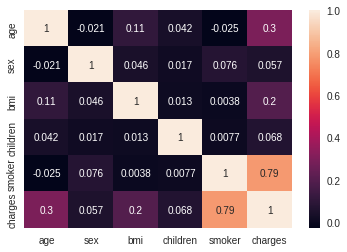

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True);

Analisando a **matriz de correlação do dataset**, é possível identificar algumas informações relevantes sobre as relações entre as variáveis.

* A variável `charges` (custo do seguro) apresenta uma boa correlação positiva com as variáveis `age` (idade) e `bmi` (índice de massa corporal), o que indica que, de maneira geral, quanto maior a idade e o índice de massa corporal de um indivíduo, maior será o custo do seu seguro de vida.
* A variável `smoker` (fumante ou não) apresenta uma forte correlação positiva com a variável `charges` (custo do seguro), o que indica que, em geral, os indivíduos que são fumantes pagam mais pelo seu seguro de vida do que os indivíduos que não são fumantes.
* A variável `children` (número de filhos) não apresenta uma forte correlação com a variável `charges` (custo do seguro), o que indica que o número de filhos de um indivíduo não tem uma influência significativa sobre o custo do seu seguro de vida.

Essas informações podem ser úteis para entender melhor as relações entre as variáveis e identificar quais variveis são mais relevantes para prever o custo do seguro de vida. 

Por exemplo, com base nas informações acima, é possível inferir que as variáveis `age`, `bmi` e `smoker` são as mais importantes para prever o custo do seguro de vida, enquanto a variável `children` pode ser menos importante.

## **Preparação dos dados**

Nesta etapa iríamos converter dados categóricos da variável `region` em dados numéricos e também normalizar os dados para que todas as variáveis tenham a mesma escala.

Entretanto vamos utilizar a biblioteca `PyCaret` onde uma das vantagens de usá-lo é a sua capacidade de automatizar a preparação de dados. 

Ele pode identificar automaticamente as colunas que são categóricas e aplicar o one-hot encoding nelas. Além disso, ele também pode normalizar os dados automaticamente.

## **Treinamento do Modelo**

Iremos começar separando nosso conjunto de dados em treino e teste.

In [13]:
test = df.sample(frac=0.20)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

print(f'Dimensões treino: {train.shape}')
print(f'Dimensões teste: {test.shape}')

Dimensões treino: (1070, 7)
Dimensões teste: (268, 7)


### Escolhendo o melhor modelo

O PyCaret é uma ferramenta muito útil para selecionar o melhor modelo de regressão. Ele fornece várias funções e métodos que facilitam a comparação e seleção de modelos.

Ao usar o PyCaret, é possível simplificar e automatizar a seleção de modelos, tornando o processomais eficiente e preciso. Além disso, é possível comparar vários modelos diferentes e escolher o melhor com base em métricas pré-definidas, como o R², sem precisar escrever códigos para cada modelo. Isso torna o processo de seleção de modelos mais rápido e menos suscetível a erros humanos.

Além disso, o PyCaret também fornece uma série de ferramentas para avaliar e interpretar os resultados do modelo selecionado, como gráficos e tabelas de importância de recursos, matrizes de confusão, entre outros, ajudando a entender como os recursos estão impactando na previsão.


In [14]:
reg = setup(data = train,
            target = 'charges',
            normalize = True,
            log_experiment = False)

,Description,Value
0,session_id,4749
1,Target,charges
2,Original Data,"(1070, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(748, 14)"


Em seguida vamos verificar qual é o melhor modelo de regressão para nosso modelo:

In [15]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2494.7484,2.136659e+07,4561.3200,0.8484,0.4119,0.2856,0.082
lightgbm,Light Gradient Boosting Machine,2749.3043,2.234466e+07,4675.2961,0.8404,0.5027,0.3411,0.115
rf,Random Forest Regressor,2633.0720,2.345503e+07,4801.0956,0.8300,0.4326,0.2971,0.302
ada,AdaBoost Regressor,4129.2298,2.777828e+07,5260.8958,0.7960,0.6179,0.6994,0.031
et,Extra Trees Regressor,2705.2590,2.802455e+07,5253.2286,0.7943,0.4524,0.2926,0.260
ridge,Ridge Regression,4206.7848,3.895527e+07,6201.6164,0.7242,0.6154,0.4138,0.012
llar,Lasso Least Angle Regression,4184.4977,3.893439e+07,6201.3855,0.7240,0.5956,0.4106,0.013
br,Bayesian Ridge,4202.8099,3.896039e+07,6202.5723,0.7240,0.6237,0.4131,0.012
lasso,Lasso Regression,4191.4978,3.896210e+07,6204.0380,0.7235,0.6070,0.4111,0.013
lr,Linear Regression,4191.7725,3.897064e+07,6204.8255,0.7234,0.5987,0.4110,0.348


A seleção do melhor modelo para um determinado cenário é uma tarefa importante e crítica na modelagem de regressão. O PyCaret ajuda nessa tarefa fornecendo uma função para comparar vários modelos ao mesmo tempo, baseando-se em uma métrica escolhida.

No caso mencionado, o melhor modelo para o cenário de previsão de custo de seguro de vida é o `GBR (Gradient Boost Regressor)`, baseado no `R²`. No entanto, é sempre uma boa prática comparar o desempenho de mais de um modelo antes de tomar uma decisão final.

É recomendável escolher os três primeiros modelos e avaliar o desempenho deles depois de otimizar seus hiperparâmetros usando a função `tune_model()` do PyCaret, que otimiza os hiperparâmetros do modelo passado como argumento, usando uma busca aleatória ou outra abordagem de otimização de hiperparâmetros.

Depois de otimizar os hiperparâmetros de cada modelo, é possível comparar seus desempenhos usando métricas como `R²`, `MAE`, entre outras e escolher o modelo que apresenta melhor desempenho.


In [16]:
# criar modelo Gradient Boosting Regressor
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2528.5186,1.984833e+07,4455.1465,0.9180,0.3512,0.2770
1,2939.2346,3.120740e+07,5586.3585,0.7888,0.4683,0.2822
2,2479.0003,2.274705e+07,4769.3871,0.8159,0.4929,0.3232
3,3041.4994,3.374919e+07,5809.4053,0.8499,0.4189,0.2753
4,2438.7206,1.828847e+07,4276.5018,0.8227,0.4409,0.2911
5,1820.6864,9.668065e+06,3109.3512,0.8728,0.2944,0.2050
6,2233.5094,1.778932e+07,4217.7387,0.8612,0.3786,0.2890
7,2686.5271,2.568424e+07,5067.9626,0.7477,0.5051,0.3050
8,2283.1202,1.588351e+07,3985.4116,0.9047,0.3507,0.2839


In [17]:
# criar modelo Random Forest Regressor:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2423.2740,2.052628e+07,4530.5940,0.9152,0.3078,0.2071
1,3083.9400,3.325412e+07,5766.6385,0.7750,0.5015,0.3008
2,2728.7518,2.396225e+07,4895.1255,0.8060,0.4298,0.2926
3,3317.4267,3.492850e+07,5910.0339,0.8446,0.4682,0.3203
4,2899.5081,2.588856e+07,5088.0805,0.7490,0.5874,0.4327
5,2306.4603,1.433086e+07,3785.6117,0.8115,0.3485,0.2719
6,2405.0383,2.008475e+07,4481.6008,0.8433,0.4313,0.3291
7,2615.3673,2.407396e+07,4906.5224,0.7636,0.5049,0.3241
8,2162.4883,1.665102e+07,4080.5665,0.9001,0.3577,0.2640


In [18]:
# criar modelo Lightgbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2706.5240,2.044482e+07,4521.5949,0.9155,0.3944,0.3128
1,3155.5581,3.072093e+07,5542.6468,0.7921,0.7121,0.3835
2,2638.3624,2.401403e+07,4900.4116,0.8056,0.6523,0.3267
3,3260.2139,3.495126e+07,5911.9589,0.8445,0.4707,0.3194
4,2926.2934,1.948713e+07,4414.4232,0.8111,0.5170,0.4042
5,2234.0850,1.123403e+07,3351.7204,0.8522,0.3331,0.2526
6,2558.7529,1.903774e+07,4363.2253,0.8515,0.4601,0.3884
7,3059.5302,2.693618e+07,5190.0082,0.7354,0.5698,0.4122
8,2571.6549,1.771881e+07,4209.3715,0.8937,0.4923,0.3389


### Tunando o modelo

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez o avalia com validação cruzada.

In [19]:
gbr_tuned = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3254.3203,2.785759e+07,5278.0286,0.8849,0.4470,0.3246
1,3248.0505,3.315330e+07,5757.8901,0.7757,0.8707,0.3483
2,2692.8350,2.287683e+07,4782.9724,0.8148,0.6083,0.3438
3,3746.1766,4.378886e+07,6617.3149,0.8052,0.6002,0.3563
4,3018.6187,1.761782e+07,4197.3590,0.8292,0.4643,0.4149
5,2426.2068,1.463644e+07,3825.7601,0.8075,0.3189,0.2296
6,2913.1172,2.079052e+07,4559.6622,0.8378,0.4915,0.4168
7,3249.3453,3.006864e+07,5483.4879,0.7047,0.6566,0.3952
8,3330.5736,2.514285e+07,5014.2646,0.8491,0.4900,0.4399


In [20]:
rf_tuned = tune_model(rf, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2615.2298,1.893769e+07,4351.7461,0.9217,0.3549,0.2745
1,2656.6739,2.830654e+07,5320.3895,0.8085,0.5187,0.2918
2,2599.8573,2.318256e+07,4814.8271,0.8123,0.4449,0.3025
3,2862.8783,2.689060e+07,5185.6144,0.8804,0.3979,0.2840
4,2692.6251,1.991844e+07,4463.0075,0.8069,0.5150,0.3786
5,2145.5362,1.116449e+07,3341.3310,0.8531,0.3055,0.2205
6,2152.4932,1.703554e+07,4127.4137,0.8671,0.3721,0.2853
7,2613.5767,2.228025e+07,4720.1956,0.7812,0.4911,0.3510
8,2237.2181,1.493520e+07,3864.6083,0.9104,0.3293,0.2618


In [21]:
lgb_tuned = tune_model(lightgbm, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3867.7161,3.791017e+07,6157.1235,0.8433,0.4411,0.3393
1,3275.7264,3.047715e+07,5520.6111,0.7938,0.4739,0.3139
2,3176.7467,2.601392e+07,5100.3847,0.7894,0.7024,0.3765
3,4275.7969,5.319249e+07,7293.3179,0.7634,0.5214,0.3373
4,3193.5419,2.116907e+07,4600.9860,0.7948,0.4490,0.3709
5,2673.7537,1.479661e+07,3846.6363,0.8054,0.2940,0.2384
6,3250.2847,2.673173e+07,5170.2736,0.7915,0.4641,0.3772
7,3540.9000,3.380501e+07,5814.2080,0.6680,0.8708,0.4236
8,3487.3175,2.459882e+07,4959.7196,0.8524,0.4715,0.4204


O tuning do modelo nos revela algumas características interessantes:

* o GBR com parâmetros default apresentou desempenho ligeiramente melhor do que sua versão tunada.
* o Random Forest tunado apresentou melhor desempenho superando até a versão default GBR
* o Light GBM tunado apresentou melhor desempenho que sua versão com parâmetros default. Mas ainda assim se mostrou inferior ao Random Forest.

No entanto vale ressaltar que o tempo de execução do Random Forest, para nosso conjunto de dados foi muito superior aos demais, esse pode ser um fator relevante no momento da escolha do modelo.

## **Plot dos modelos**

Em seguida vamos plotar o erro de cada um dos modelos tunados e comparar qual obteve o melhor desempenho. Começando com o Gradient Boosting Regressor:

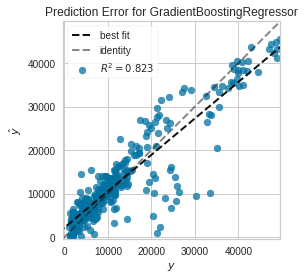

In [22]:
# GBR
plot_model(gbr_tuned, plot='error')

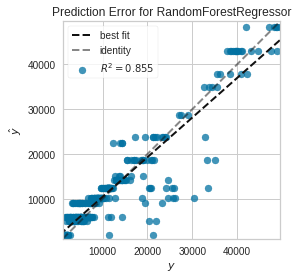

In [23]:
# RF
plot_model(rf_tuned, plot='error')

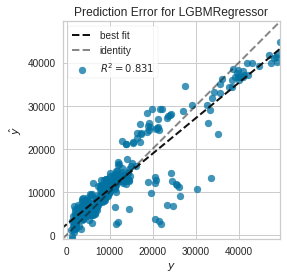

In [24]:
# Light GBM
plot_model(lgb_tuned, plot='error')

Depois de selecionar e otimizar o modelo com o PyCaret, é importante testar como ele se sai com dados "desconhecidos" antes de tomar a decisão final. Isso é conhecido como validação do modelo.

## **Validação do modelo**

Diante dos resultados e levando em consideração nossa análise, apesar do modelo de Random Forest ter apresentado desempenho ligeiramente superior ao GBR em algumas métricas de avaliação, como o R² e MAE, é importante levar em conta também o tempo de execução do modelo. 

O modelo de Random Forest pode ser computacionalmente mais custoso, não justificando, portanto, o pequeno ganho de performance. Em nosso cenário, levando em consideração todos os aspectos, escolheríamos o GBR como o modelo final.

In [25]:
# finalizar modelo
final_gbr = finalize_model(gbr)

In [26]:
gbr_pred = predict_model(final_gbr, data=test)
gbr_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2605.7532,2.535259e+07,5035.1355,0.8315,0.4535,0.2535


,age,sex,bmi,children,smoker,region,charges,Label
0,54,0,31.900,3,0,southeast,27322.73386,13090.238344
1,54,1,25.100,3,1,southwest,25382.29700,25821.746330
2,46,1,19.855,0,0,northwest,7526.70645,9053.929009
3,62,1,37.400,0,0,southwest,12979.35800,14113.165177
4,41,0,32.600,3,0,southwest,7954.51700,6796.420634


Com exceção de alguns potenciais outliers nossas previsões (variável `Label`) estão próximas dos valores reais charges.

## **Conclusão**

Construímos e comparamos alguns modelos de Machine Learning para realizar a previsão de custos de seguro de vida. Utilizamos o framework PyCaret para automatizar o processo de seleção e otimização de modelos, o que tornou o processo mais simples e rápido.

No entanto, é importante destacar que tais técnicas de Auto Machine Learning não devem ser utilizadas sem que haja, primeiro, um entendimento claro do problema e dos dados que estamos lidando. A análise exploratória dos dados e a compreensão dos problemas são fundamentais antes de selecionar qualquer modelo ou técnica.

Em nossa análise, observamos que, apesar de apresentar um desempenho ligeiramente superior, o algoritmo de Random Forest mostrou-se mais lento na execução do que o Gradient Boosting Regressor, justificando nossa escolha por esse último.

Existem diversas melhorias que podemos fazer nesse projeto, como avaliar outros modelos e/ou outras métricas de desempenho, ou realizar outros tratamentos nos dados, como remoção/ajustes de outliers que podem influenciar negativamente nossas previsões - e que optamos por não fazê-lo nessa análise.